## Predicting Diabetes in patients using machine learning

This notebook looks into various Python based Data Science and Machine learning library as an attempt to build a machine learning model capable of predicting whether a patient has diabetes or not.

The following approach to follow,for building a machine learning model:

1. Problem Definition
2. Data
3. Evaluation 
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition
    
    Given clinical parameters about a patient ,can we predict whether or not they have diabetes?
    
## 2. Data

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
The dataset istaken from:https://www.kaggle.com/uciml/pima-indians-diabetes-database

## 3. Evaluation

If we reach 95% of accuracy in predicting whether a patient has diabetes or not,
then we'll pursue the project.

## 4. Features

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome.
* Pregnancies (number of times pregnant)
* Glucose - Plasma glucose
* Blood Pressure - Diastolic blood pressure (mm Hg)
* Skin Thickness - Triceps skin fold thickness (mm)
* Insulin - 2-Hour serum insulin (mu U/ml)
* BMI - Body mass index (weight in kg/(height in m)^2)
* Diabetes Pedigree - Diabetes pedigree function
* Age in years
* Outcome (0 - No Diabetes, 1 - Diabetes)

In [1]:
# Importing all the tools we need

# Regular EDA(exploratory data analysis) and all the plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For plotting inside notebook
%matplotlib inline

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [2]:
# Import the dataset
data = pd.read_csv("C:\\Users\\admin\\Desktop\\sample_project_1\\diabetes_data.csv")

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Data Exploration (EDA OR Exploratory data analysis)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
len(data)

768

In [7]:
data.shape

(768, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# Are there any missing values
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

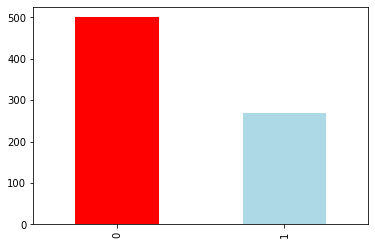

In [12]:
data["Outcome"].value_counts().plot(kind="bar",color = ["Red", "lightblue"])

## Diabetes frequency according to blood pressure

In [13]:
data.BloodPressure.value_counts()

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
82     30
66     30
88     25
84     23
90     22
58     21
86     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
96      4
44      4
110     3
106     3
100     3
98      3
108     2
104     2
46      2
55      2
30      2
95      1
61      1
102     1
38      1
40      1
24      1
114     1
122     1
Name: BloodPressure, dtype: int64

In [14]:
# Compare two columns
pd.crosstab(data.Outcome,data.BloodPressure)

BloodPressure,0,24,30,38,40,44,46,48,50,52,...,96,98,100,102,104,106,108,110,114,122
Outcome,,,,,,,,,,,,,,,,,,,,,
0,19,1,1,1,0,4,2,4,8,8,...,3,1,2,0,0,2,1,1,0,1
1,16,0,1,0,1,0,0,1,5,3,...,1,2,1,1,2,1,1,2,1,0


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

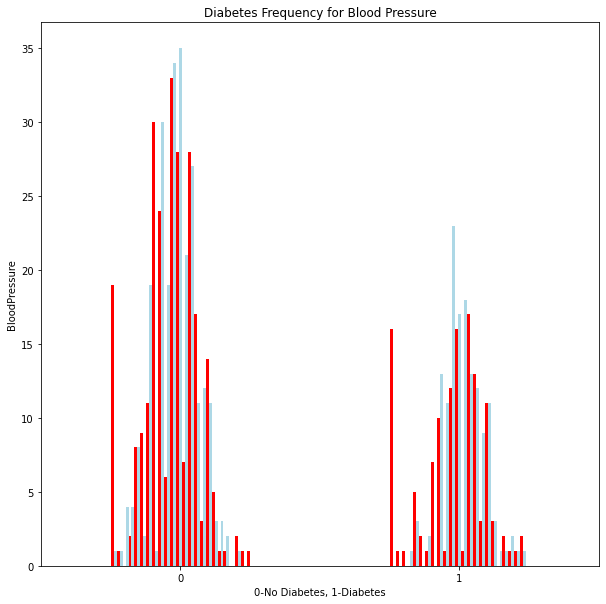

In [15]:
# Plot crosstab
pd.crosstab(data.Outcome,data.BloodPressure).plot(kind="bar",
                                                 figsize=(10,10),
                                                 color = ["Red","lightblue"],
                                                 legend=False)
                                           

plt.title("Diabetes Frequency for Blood Pressure")
plt.xlabel("0-No Diabetes, 1-Diabetes")
plt.ylabel("BloodPressure")
plt.xticks(rotation=0)

<AxesSubplot:ylabel='Frequency'>

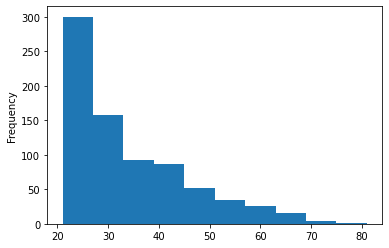

In [16]:
data["Age"].plot.hist()

## Diabetes frequency for insulin

In [17]:
data.Insulin.value_counts()

0      374
105     11
140      9
130      9
120      8
      ... 
193      1
191      1
188      1
184      1
846      1
Name: Insulin, Length: 186, dtype: int64

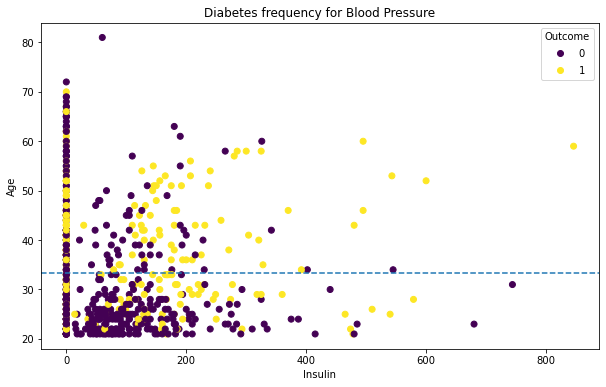

In [18]:
# Make more visual
fig,ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=data["Insulin"],
                    y=data["Age"],
                    c=data["Outcome"])

# Customize the plot
ax.set(title="Diabetes frequency for Blood Pressure",
      xlabel="Insulin",
      ylabel="Age");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Outcome")

# Add a horizontal line
ax.axhline(y=data["Age"].mean(),
          linestyle="--")

<AxesSubplot:ylabel='Frequency'>

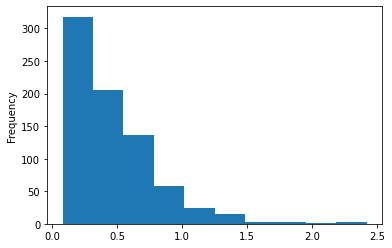

In [19]:
data["DiabetesPedigreeFunction"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

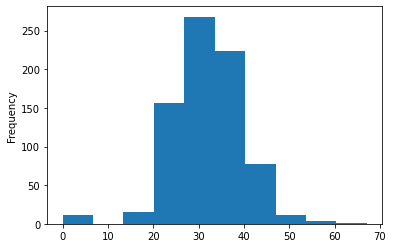

In [20]:
data["BMI"].plot.hist()

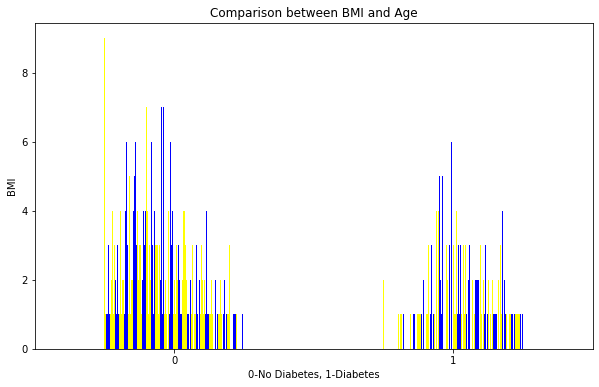

In [21]:
pd.crosstab(data.Outcome, data.BMI).plot(kind="bar",
                                     figsize=(10,6),
                                     color=["Yellow","Blue"],
                                     legend=False)

plt.title("Comparison between BMI and Age")
plt.ylabel("BMI")
plt.xlabel("0-No Diabetes, 1-Diabetes")
plt.xticks(rotation=0);

In [22]:
pd.crosstab(data.Pregnancies, data.BloodPressure)

BloodPressure,0,24,30,38,40,44,46,48,50,52,...,96,98,100,102,104,106,108,110,114,122
Pregnancies,,,,,,,,,,,,,,,,,,,,,
0,10,0,0,0,1,0,0,0,2,2,...,1,0,1,0,1,0,0,1,0,0
1,1,1,2,1,0,1,1,3,5,0,...,0,1,0,1,0,0,0,0,0,1
2,7,0,0,0,0,0,1,1,1,6,...,1,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,2,0,0,2,2,...,0,0,1,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,2,0,0,0
6,3,0,0,0,0,1,0,0,2,0,...,1,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0


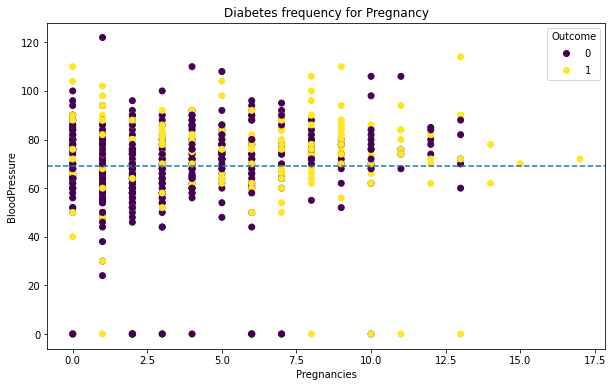

In [23]:
# Make more visual
fig,ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=data["Pregnancies"],
                    y=data["BloodPressure"],
                    c=data["Outcome"])

# Customize the plot
ax.set(title="Diabetes frequency for Pregnancy",
      xlabel="Pregnancies",
      ylabel="BloodPressure");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Outcome")

# Add a horizontal line
ax.axhline(y=data["BloodPressure"].mean(),
          linestyle="--")

In [24]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


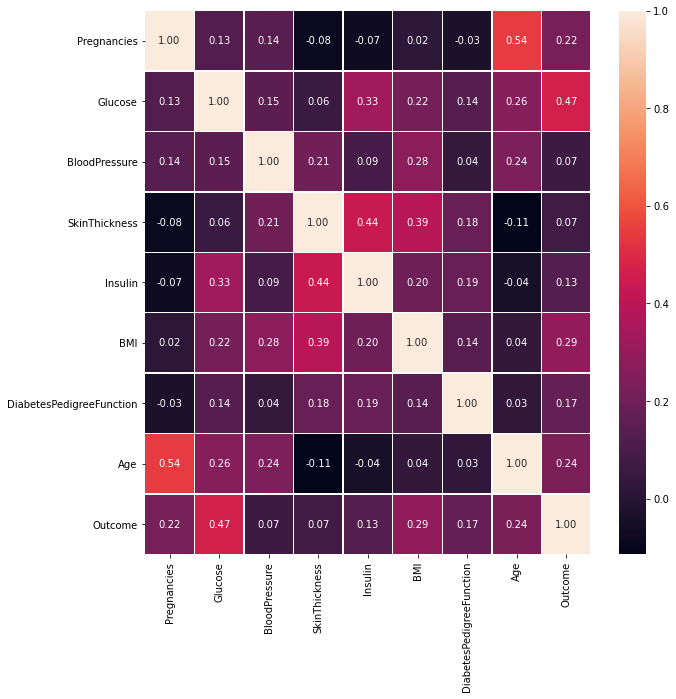

In [25]:
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cbar=True)

## Modelling

In [26]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
# Splitting data into X and y
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [28]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [29]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [30]:
# Splitting the data into train and test sets
np.random.seed(42)

# Splitting into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [31]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [32]:
y_train, len(y_train)

(60     0
 618    1
 346    0
 294    0
 231    1
       ..
 71     0
 106    0
 270    1
 435    1
 102    0
 Name: Outcome, Length: 614, dtype: int64,
 614)

# Now the data is split into training and test set,it's time to build machine              learning model

* The data will be trained on the training set.
* The data will be tested on the test set.

* Three machine learning models will be used:

    1. Logistic Regression
    2. K Nearest Neighbors Classifier
    3. Random Forest Classifier

In [33]:
# Put models in a dictionary
models={"Logistic Regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}

# Create a fit and score model
def fit_and_score(models,X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine Learning models
    X_train : training data(no labels)
    X_test : testing data(no labels)
    y_train : training labels
    y_test: test labels
    """
    # Set random seed
    np.random.seed(42) 
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append its scores to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores    

In [34]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores

C:\Users\admin\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7467532467532467,
 'KNN': 0.6623376623376623,
 'Random Forest': 0.7207792207792207}

## Model Comparision

<AxesSubplot:>

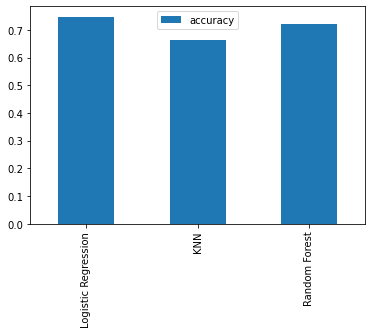

In [35]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

## Hyperparameter tuning using RandomizedSearchCV

Models to be tuned:

1. Logistic Regression
2. Random Forest
.....using RandomizedSearchCV

In [48]:
# Create hyperparameter grid for Logistic Regression model
log_reg_grid = {"C" :np.logspace(-4,4,20),
               "solver":["liblinear"]}

# Create a hyperparameter grid for Random Forest Classifier
rf_grid = {"n_estimators":np.arange(10,1000,100),
          "max_depth":[None,3,5,10],
          "max_features":["auto","sqrt"],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

In [49]:
# Tune Logistic Regression model

# Setup random seed
np.random.seed(42)

# Set up random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [50]:
# Find the best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [51]:
# Evaluate the model
rs_log_reg.score(X_test,y_test)

0.7597402597402597

Now we have tuned Logistic Regression model,repeat the same for Random Forest Classifier

In [52]:
# Tune Random Forest model

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparameter search for RandomForestClassifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910])},
                   verbose=True)

In [53]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 810,
 'min_samples_split': 18,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 10}

In [54]:
# Evaluate the model
rs_rf.score(X_test,y_test)

0.7467532467532467

## Hyperparameter tuning using GridSearchCV

In [55]:
# Different hyperparameters for Logistic Regression model
log_reg_grid = {"C" :np.logspace(-4,4,30),
               "solver":["liblinear"]}

# Set up grid hyperparameters search for Logistic Regression model
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit the grid hyperparameters search  for Logistic Regression model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [56]:
# Find the best hyperparameters
gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [57]:
# Evaluate the model
gs_log_reg.score(X_test,y_test)

0.7532467532467533

## Evaluating our tuned machine learning model,beyond accuracy

* ROC Curve and AUC Curve
* Confusion matrix
* Classification report
* Precision score
* Recall score
* F1 score

To make comparison and evaluate our trained model, we need to make predictions

In [58]:
# Make prediction with tuned model
y_preds = gs_log_reg.predict(X_test)

In [59]:
y_preds

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [60]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

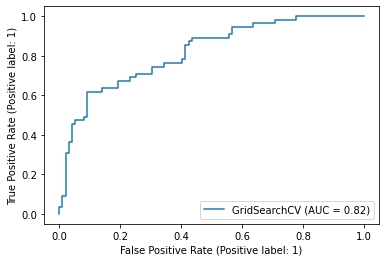

In [63]:
# Plot ROC Curve and calculate AUC metrics
plot_roc_curve(gs_log_reg,X_test,y_test)

In [64]:
# Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[80 19]
 [19 36]]


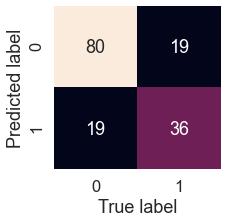

In [65]:
# Make confusion matrix more visual
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a confusion matrix using seaborns heatmap()
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test,y_preds)

In [66]:
# Classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



## Calculate evaluation metrics usind cross validation

In [67]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [68]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=2.592943797404667,
                         solver="liblinear")

In [71]:
# Cross validated Accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")

cv_acc

array([0.76623377, 0.74025974, 0.74025974, 0.81045752, 0.77124183])

In [72]:
cv_acc = np.mean(cv_acc)
cv_acc

0.7656905186316951

In [73]:
# Cross Validated Precision
cv_precision = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring="precision")

cv_precision = np.mean(cv_precision)
cv_precision

0.7140894777736884

In [74]:
# Cross validated recall
cv_recall = cross_val_score(clf,
                           X,
                           y,
                           cv=5,
                           scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.5560447239692523

In [75]:
# Cross Validated F1
cv_f1 = cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.6228813569218751

<AxesSubplot:title={'center':'Cross validated classification metrics'}>

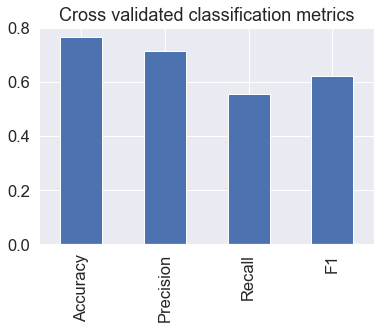

In [82]:
# Visualize cross validation metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_precision,
                         "Recall":cv_recall,
                         "F1":cv_f1},
                         index=[0])
                         

cv_metrics.T.plot.bar(title="Cross validated classification metrics",
                     legend=False)

## Feature importance

In [83]:
# fit Logistic Regression model
clf = LogisticRegression(C=2.592943797404667,
                         solver="liblinear")

clf.fit(X_train,y_train)

LogisticRegression(C=2.592943797404667, solver='liblinear')

In [84]:
# Check coef
clf.coef_

array([[ 0.06603589,  0.02951133, -0.0161597 ,  0.00243701, -0.00136568,
         0.08148157,  0.56096203,  0.03014991]])

In [85]:
# Match the coef_ of features to columns
feature_dict = dict(zip(data.columns, list(clf.coef_[0])))
feature_dict

{'Pregnancies': 0.06603589392034523,
 'Glucose': 0.029511333969285958,
 'BloodPressure': -0.0161597023371079,
 'SkinThickness': 0.0024370085136590637,
 'Insulin': -0.0013656798647433696,
 'BMI': 0.08148156657901517,
 'DiabetesPedigreeFunction': 0.560962028672356,
 'Age': 0.03014991153568311}

<AxesSubplot:title={'center':'Feature Importance'}>

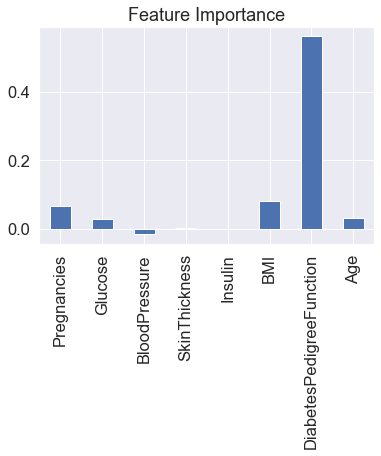

In [86]:
# Visualize feature dict
feature_df = pd.DataFrame(feature_dict,index=[0])

feature_df.T.plot.bar(title="Feature Importance",
                     legend=False)

## Experimentation

In [87]:
# Using other classification models
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {"LinearSVC": LinearSVC(),
         "SVC" : SVC(),
         "RandomForestClassifier":RandomForestClassifier()}

# Create a fit and score model
def fit_and_score(models,X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine Learning models
    X_train : training data(no labels)
    X_test : testing data(no labels)
    y_train : training labels
    y_test: test labels
    """
    # Set random seed
    np.random.seed(42) 
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append its scores to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores    

In [90]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores

C:\Users\admin\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


{'LinearSVC': 0.6558441558441559,
 'SVC': 0.7662337662337663,
 'RandomForestClassifier': 0.7207792207792207}